# Urban Farming in Milan, Italy
# Problem Statement


1. Identify Crops suitable for Urban farming inlcuing environmental, climatic conditions in urban areas.

2. Develop an algorithm that takes into account the environmental conditions, location, and available infrastructure to predict the potential growth of crops in urban areas. The algorithm should analyze facltors such as sunlight exposure, soil quality, water availability, and temperature to determine the most suitable crops for a specific urban farming site.

3. Address the risks associated with urban farming to ensure a successful and sustainable operation. Minimise potential risks related to urban agriculture, social and economic risks, including health risks from wastewater irrigation, trace metal, zoonotic risks, and other health risks. By identifying and mitigating these risks, we can suggest solutions to potential urban farmers to create a safe and productive environment for growing crops in urban settings.


# Data Collection
Data is collected from different sources for few vegetables, salads and fruits and synthetic data is generated considering the following features

Name
Min_temp(C)
Max_temp(C)
Rainfall(mm) Min
Rainfall(mm) Max
Ph(Min)
pH(Max)
Soil_Type
Fertility
Light_Hours(Min)
Light_Hours(Max)
Light_intensity(Min) (μmol·m−2·s−1)
Light_intensity(Max)(μmol·m−2·s−1)
Relative Humidity (%)
N-P-K Ratio
Season	      
Yield (100g/ha)


# Data Understanding and Preparation

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.express as px
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error
from matplotlib import cm


#mount Gdrive
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# reading the latest updated dataset into a dataframe for futher analysis
df=pd.read_csv("/content/drive/MyDrive/MachineLearningProjects/AgritechMilano/synthetic_veg_normal_crop_data.csv")

# Drop the first column Serial No.
df.drop('S. no.', axis=1, inplace=True)
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             1000 non-null   object 
 1   Soil_Type        1000 non-null   object 
 2   Fertility        1000 non-null   object 
 3   Photoperiod      1000 non-null   object 
 4   N-P-K Ratio      1000 non-null   object 
 5   Temperature      1000 non-null   float64
 6   Rainfall         1000 non-null   float64
 7   pH               1000 non-null   float64
 8   Light_Hours      1000 non-null   float64
 9   Light_Intensity  1000 non-null   float64
 10  Rh               1000 non-null   float64
 11  Yield            1000 non-null   float64
 12  Season           1000 non-null   object 
dtypes: float64(7), object(6)
memory usage: 101.7+ KB


In [ ]:
df.shape


(1000, 13)



*   There are 1000 datapoints/rows and 13 features
*   Its observed that there are no null values/ missing values in the dataset
*   Among the features, the below features have Categorical values
      * Name
      * Soil_Type      
      * Fertility         
      * Photoperiod    
      * N-P-K Ratio
      * Season  



*   List item





In [ ]:
df_unique = df.nunique().to_frame().reset_index()
df_unique.columns = ['Variable','DistinctCount']
print(df_unique)


           Variable  DistinctCount
0              Name             10
1         Soil_Type             10
2         Fertility              2
3       Photoperiod              1
4       N-P-K Ratio              2
5       Temperature           1000
6          Rainfall           1000
7                pH           1000
8       Light_Hours           1000
9   Light_Intensity           1000
10               Rh           1000
11            Yield           1000
12           Season              9


In [ ]:
# Get numerical and categorical columns
# Display the count of unique values for Categorical Columns

# Remove leading and trailing spaces for values in Season column
df['Season'] = df['Season'].str.strip()

df_ = df.select_dtypes(exclude=['int', 'float'])
print('Categorical Columns:')
print()
for col in df_.columns:
    print(df_[col].value_counts()) # to print count of every category
    print("\n")

Categorical Columns:

Name
Tomatoes          100
Eggplants         100
Asparagus         100
Chilli Peppers    100
Cabbage           100
Cucumbers         100
Potatoes          100
Cauliflowers      100
Broccoli          100
Green Peas        100
Name: count, dtype: int64


Soil_Type
Fertile, well-drained loam or sandy loam soil                          100
Well-drained, sandy loam or loam soil with high organic content        100
 Deep sandy loam                                                       100
medium, organic                                                        100
Well-drained, fertile loam with high organic content                   100
Well-drained, sandy loam soil                                          100
Loamy, well-drained soil                                               100
Fertile, well-drained, moist soil with high organic matter content.    100
Rich, well-drained, loamy soil                                         100
Light, sandy, fertile, and well-drained 

# Descriptive Statistics

In [ ]:
df.describe().T.round(decimals=2)


,count,mean,std,min,25%,50%,75%,max
Temperature,1000.0,21.22,3.39,9.38,19.11,21.10,23.95,31.25
Rainfall,1000.0,899.82,248.83,408.92,717.77,895.41,1047.53,1634.16
pH,1000.0,6.31,0.39,4.87,6.09,6.34,6.56,7.40
Light_Hours,1000.0,7.79,1.08,5.92,6.93,7.28,8.86,11.59
Light_Intensity,1000.0,454.16,107.98,208.20,377.06,434.97,534.28,802.80
Rh,1000.0,62.49,9.44,41.95,54.59,60.63,70.85,94.31
Yield,1000.0,25.41,14.87,4.65,18.98,24.17,29.42,65.13


# Data Visualization

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 64.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 91.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 73.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 83.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 65.0% of the points cannot be plac

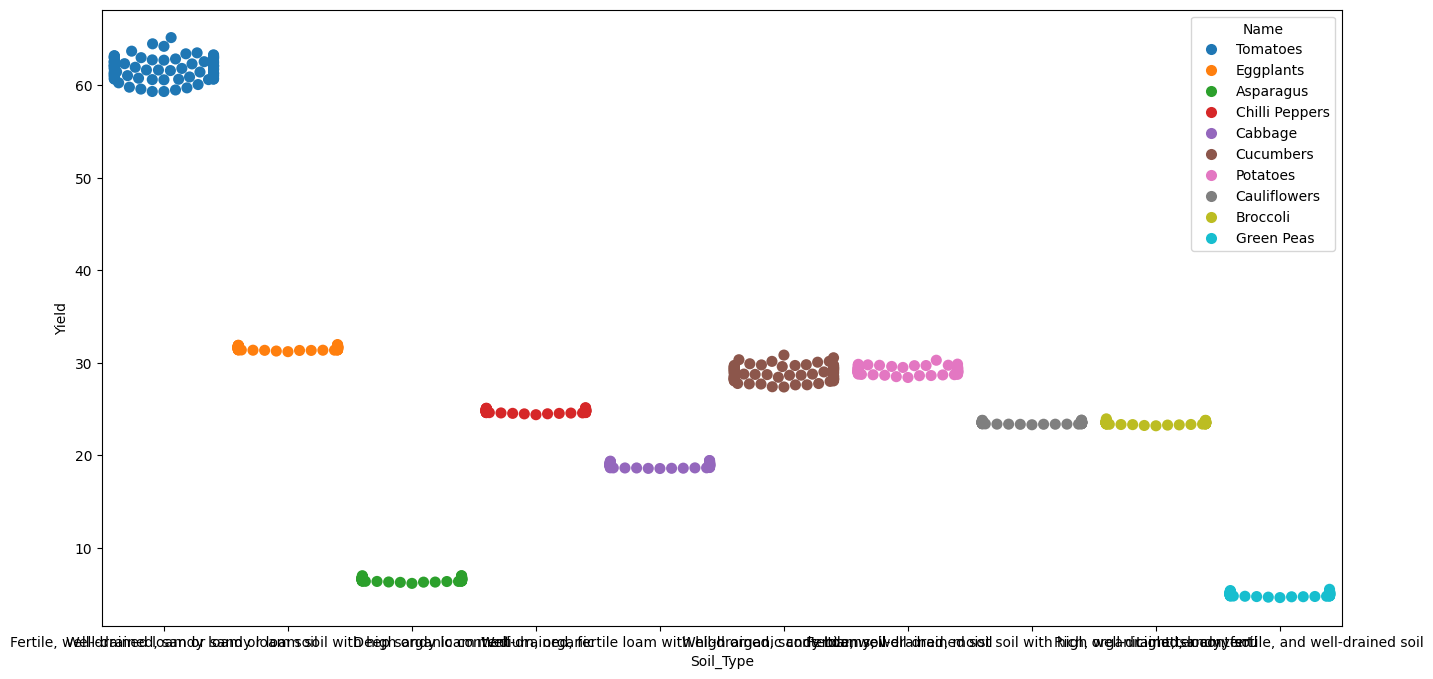

In [ ]:
# Understand the distribution of numeric feature Yield across other Categorical features for different crops
# plot the swarmplot
# size set to 8
# Set the width and height of the figure
plt.figure(figsize=(16,8))
sns.swarmplot(x ="Soil_Type", y = "Yield", hue='Name',
              data = df, size = 8)
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 24.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


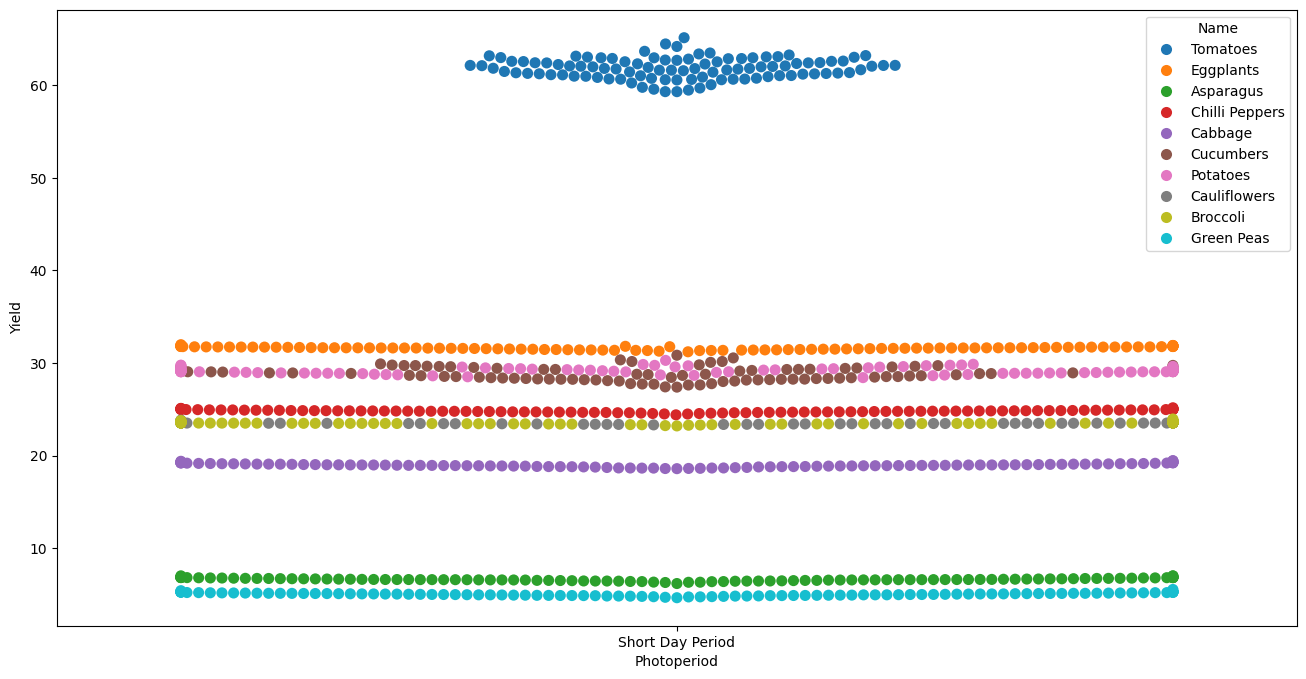

In [ ]:
# Set the width and height of the figure
plt.figure(figsize=(16,8))
sns.swarmplot(x ="Photoperiod", y = "Yield", hue='Name',
              data = df, size = 8)
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 31.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 23.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 53.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 57.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


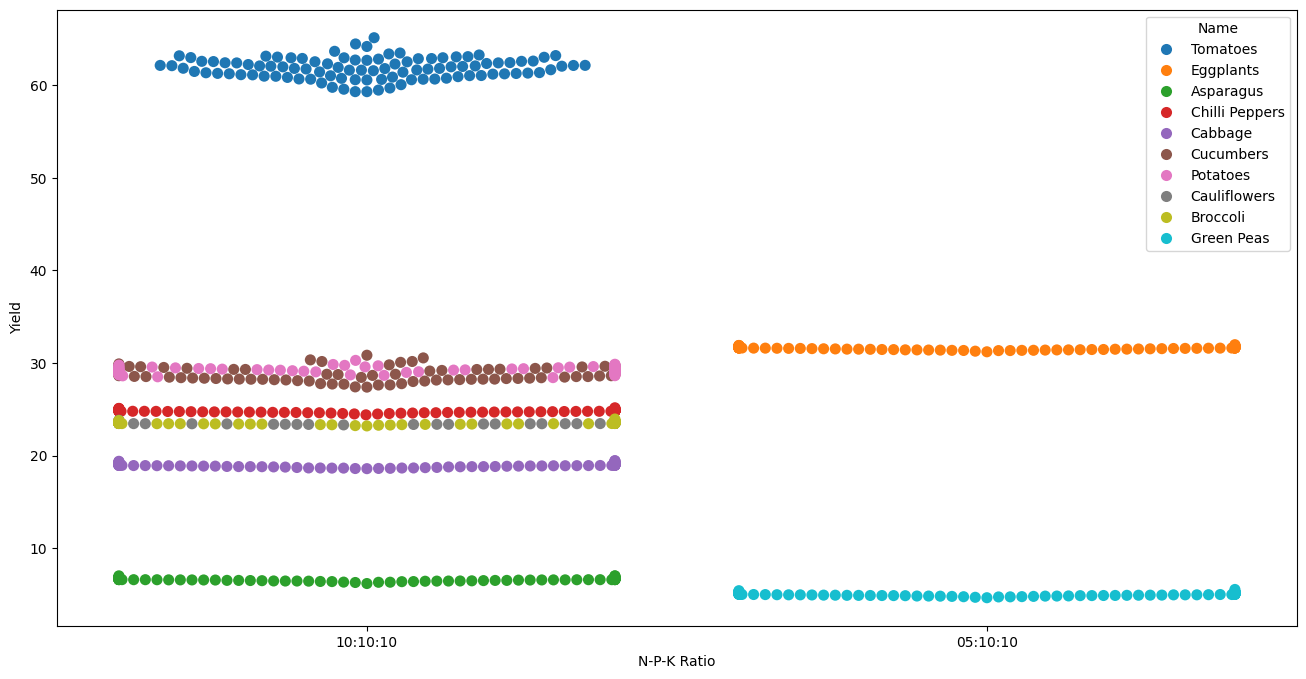

In [ ]:
# Set the width and height of the figure
plt.figure(figsize=(16,8))
sns.swarmplot(x ="N-P-K Ratio", y = "Yield", hue='Name',
              data = df, size = 8)
plt.show()

<Figure size 1600x1000 with 0 Axes>

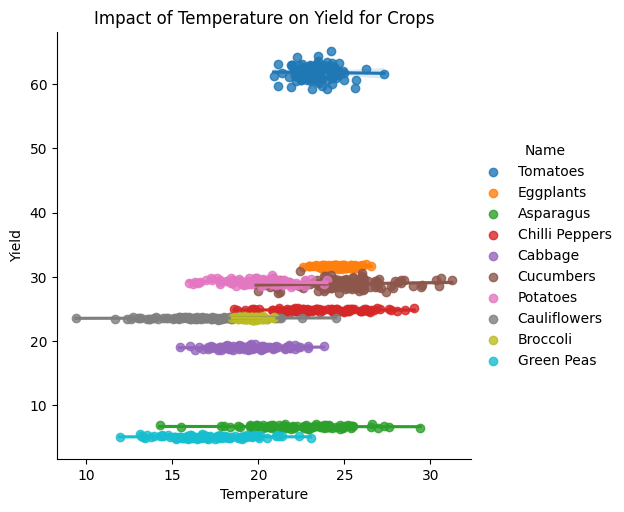

<Figure size 1600x1000 with 0 Axes>

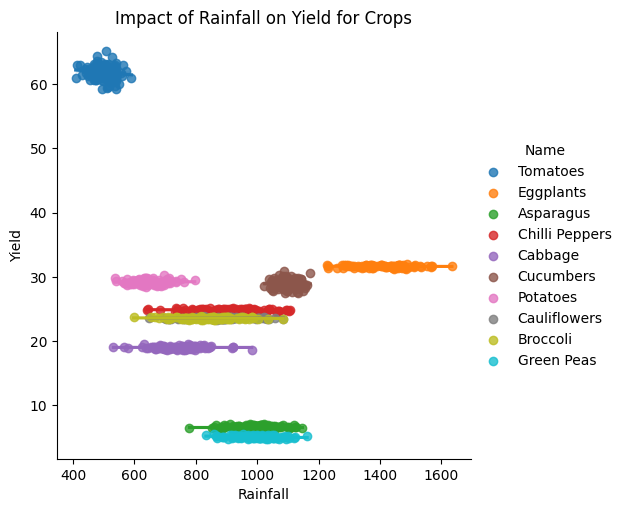

<Figure size 1600x1000 with 0 Axes>

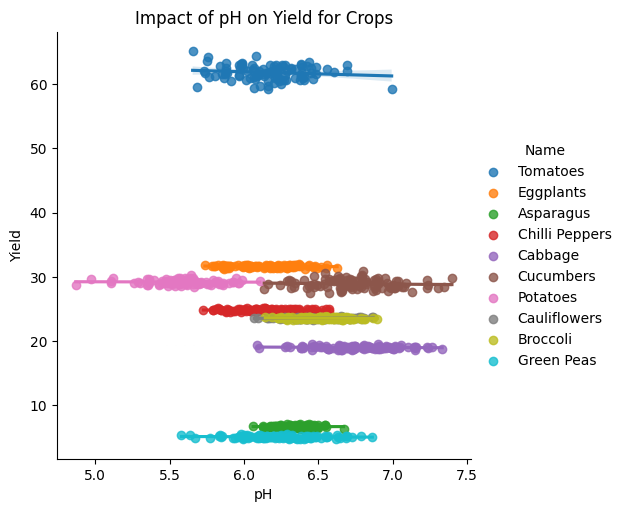

<Figure size 1600x1000 with 0 Axes>

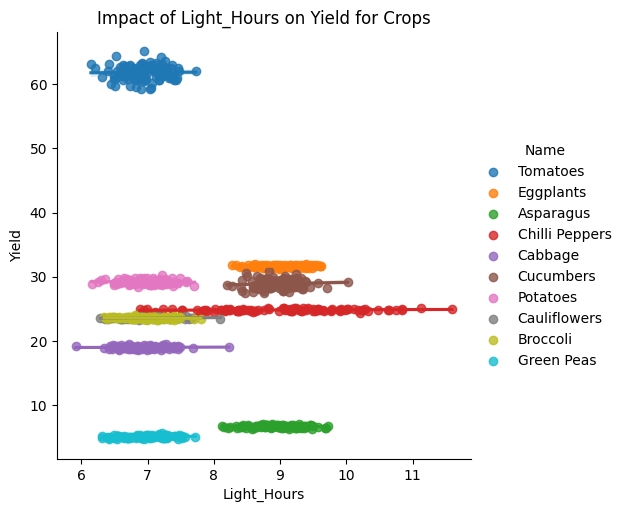

<Figure size 1600x1000 with 0 Axes>

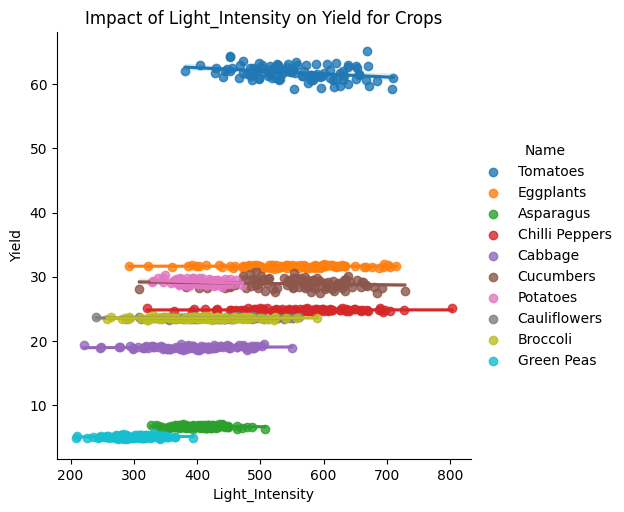

<Figure size 1600x1000 with 0 Axes>

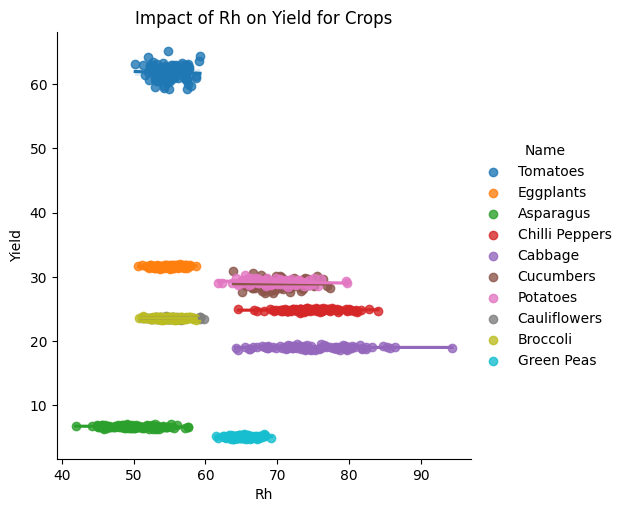

In [ ]:
numerical_columns = df.select_dtypes(include=['int', 'float'])
for col in numerical_columns:
    if col != 'Yield':
      # Set the width and height of the figure
      plt.figure(figsize=(16,10))
      #  Influence of each feature on Crop Yield
      sns.lmplot(x=col, y='Yield', hue='Name', data=df, height=5)
      # Add title
      plt.title(f"Impact of {col} on Yield for Crops")
      plt.xlabel(f"{col}")
      plt.ylabel('Yield')
      plt.show()


## Observations based on the above plots


1. Impact of Temperature on Crop Yield

    *   Tomatoes provide higher yield when the temperatures are between 20-26 degrees Celsius
    


2. Impact of Rainfall on Crop Yield

    *  Eggplants need higher rainfall for optimum yield whereas Tomatoes are observed to yield high even when the rainfall is less

3. Impact of Soil pH on Crops and its yield

    * Most crops produce high yield when soil pH is between 5.0 - 7.5


4. Impact of Light Hours on different crops and its yield

    * Chilli Peppers need longer light hours to produce its optimum yield

    * Its observed that crops like Tomatoes, Potatoes, Broccoli and Green Peas need 6 to 7/8 hours of light for its optimum yield


5. Impact of Light Intensity on Crops and its Yield

    * Chilli Peppers need higher light intensity for its optimum yield



6. Impact of Relative Humidity (RH) on Crops and its Yield

    * Tomatoes and Asparagus produces optimum yield when the Relative Humidity is relatively lower compared to other crops whereas Cabbage produces optimum yield when the Humidity is high



Text(0, 0.5, 'Yield')

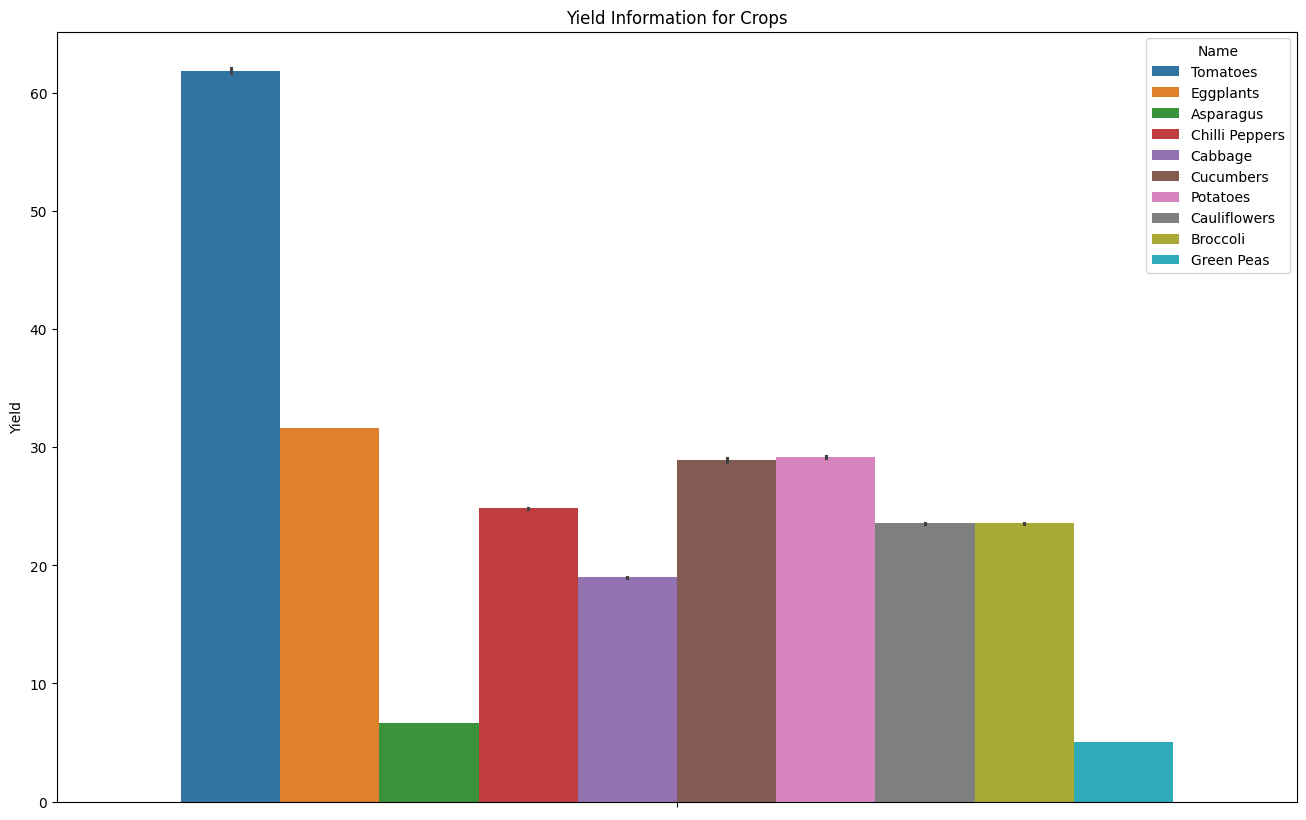

In [ ]:
# Set the width and height of the figure
plt.figure(figsize=(16,10))

# Add title
plt.title("Yield Information for Crops")

# Bar chart showing Yield details for different crops
sns.barplot(data=df, y=df['Yield'], hue='Name')

# Add label for vertical axis
plt.ylabel("Yield")

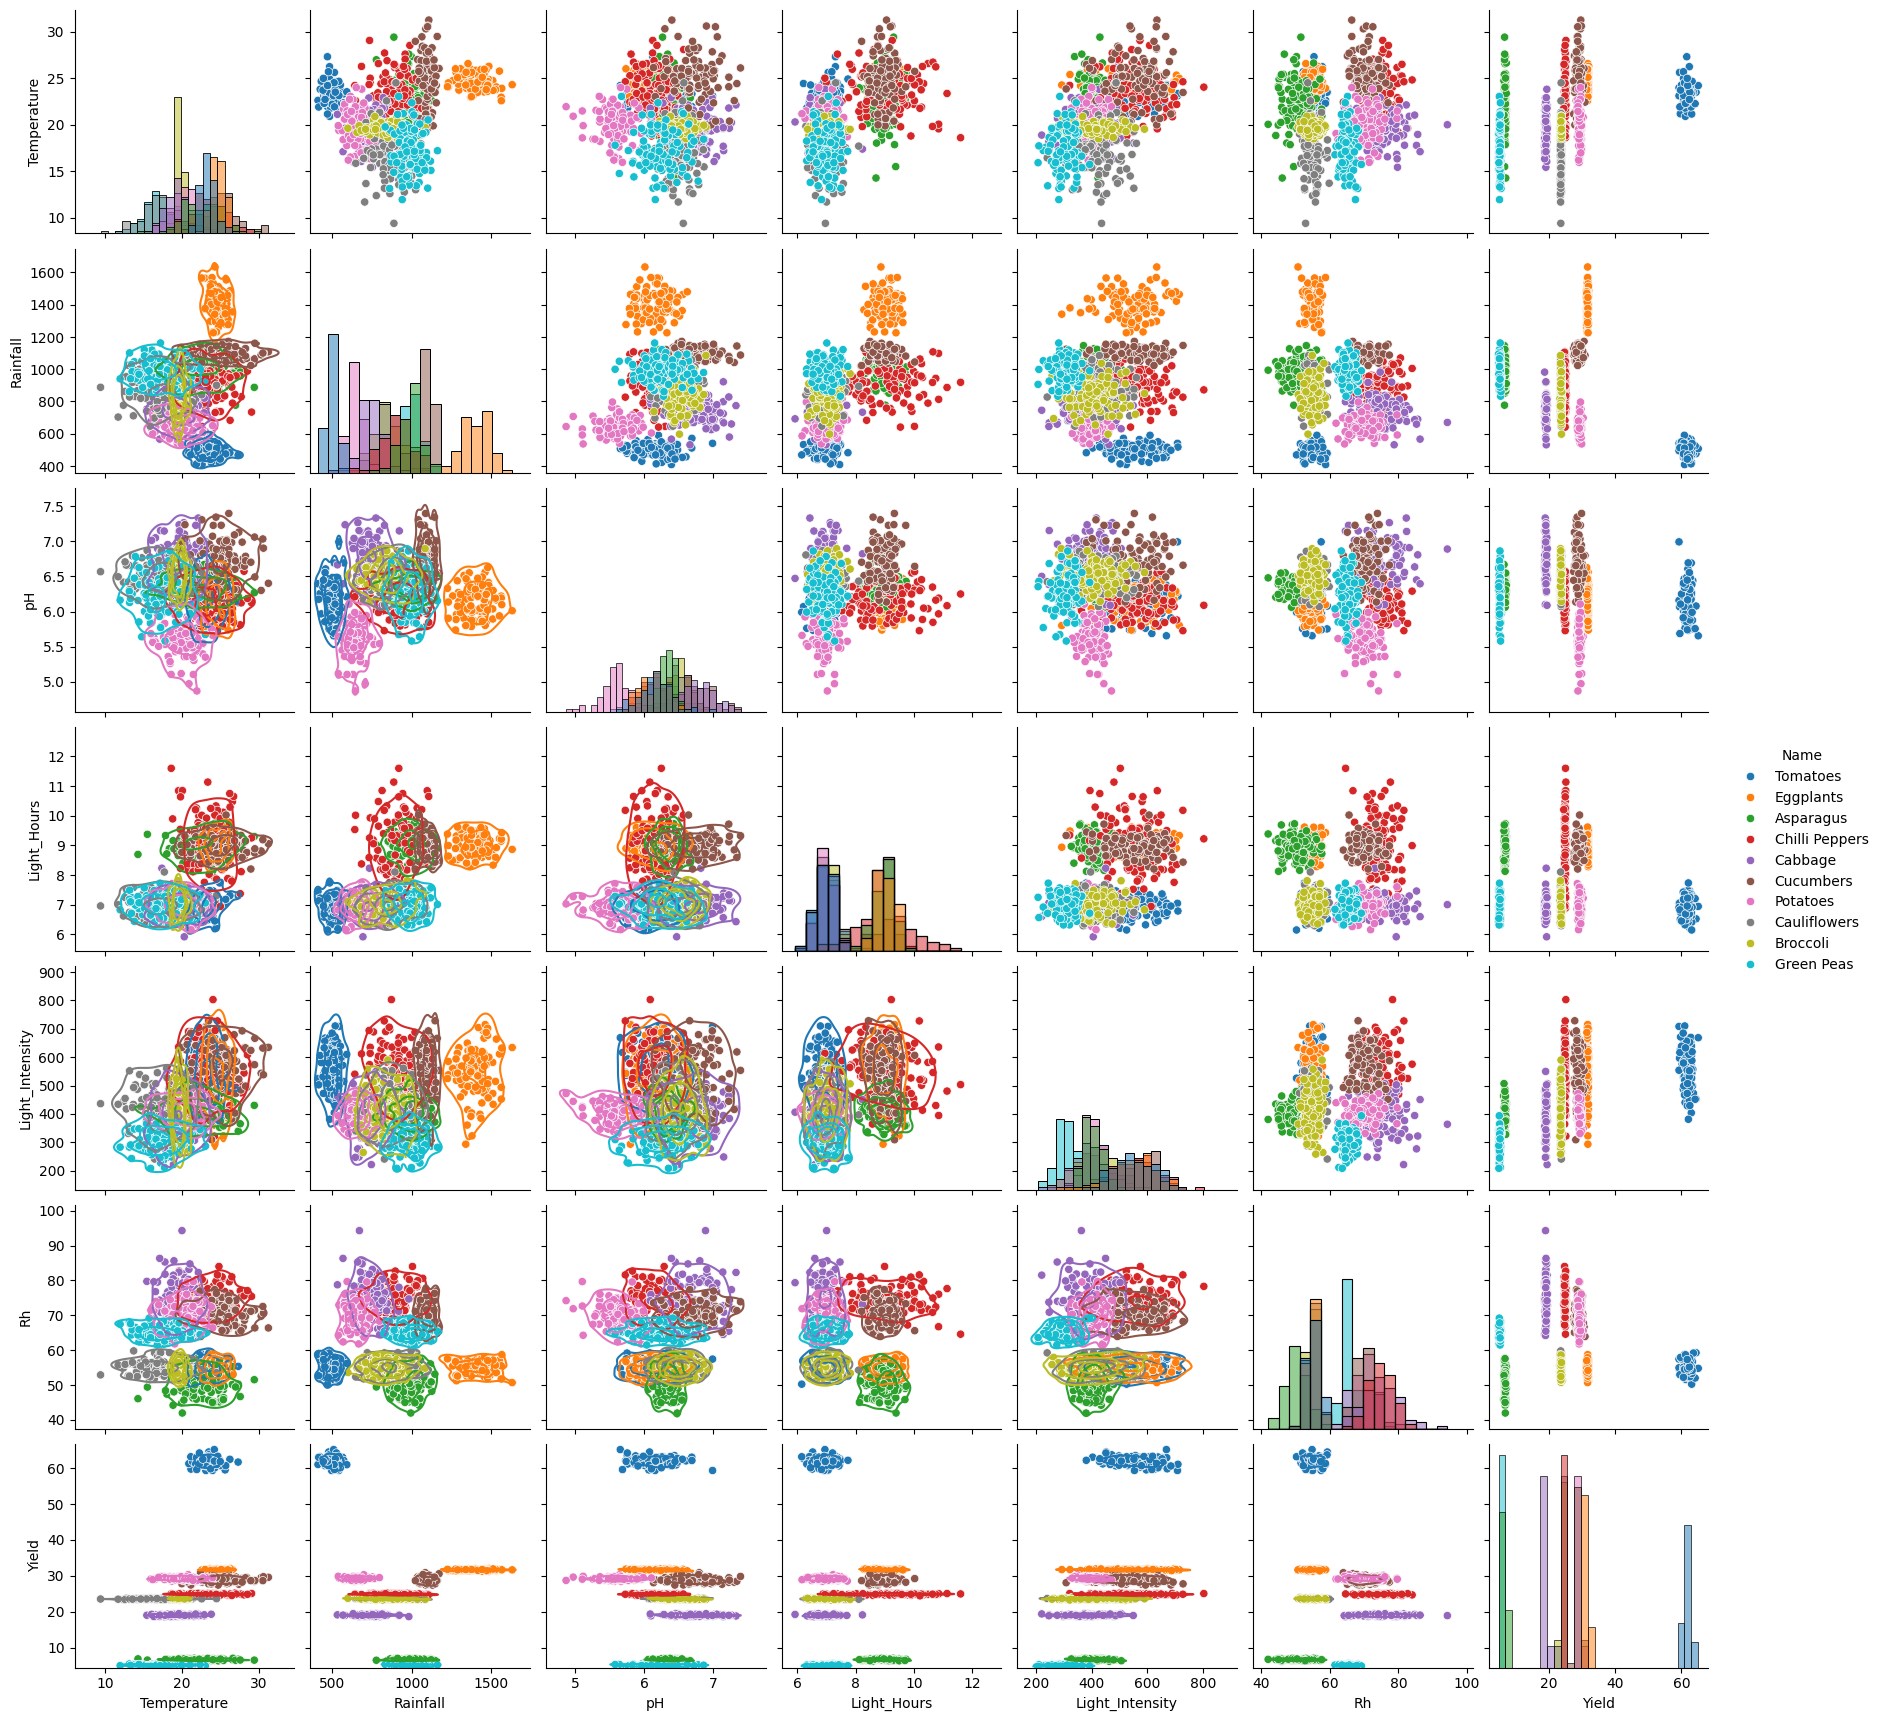

In [ ]:
# sns.pairplot(df, hue="Name", diag_kind="hist")

g = sns.pairplot(df, hue='Name', diag_kind="hist")
g.map_lower(sns.kdeplot, levels=4, color=".2")

## To understand how well the features are related

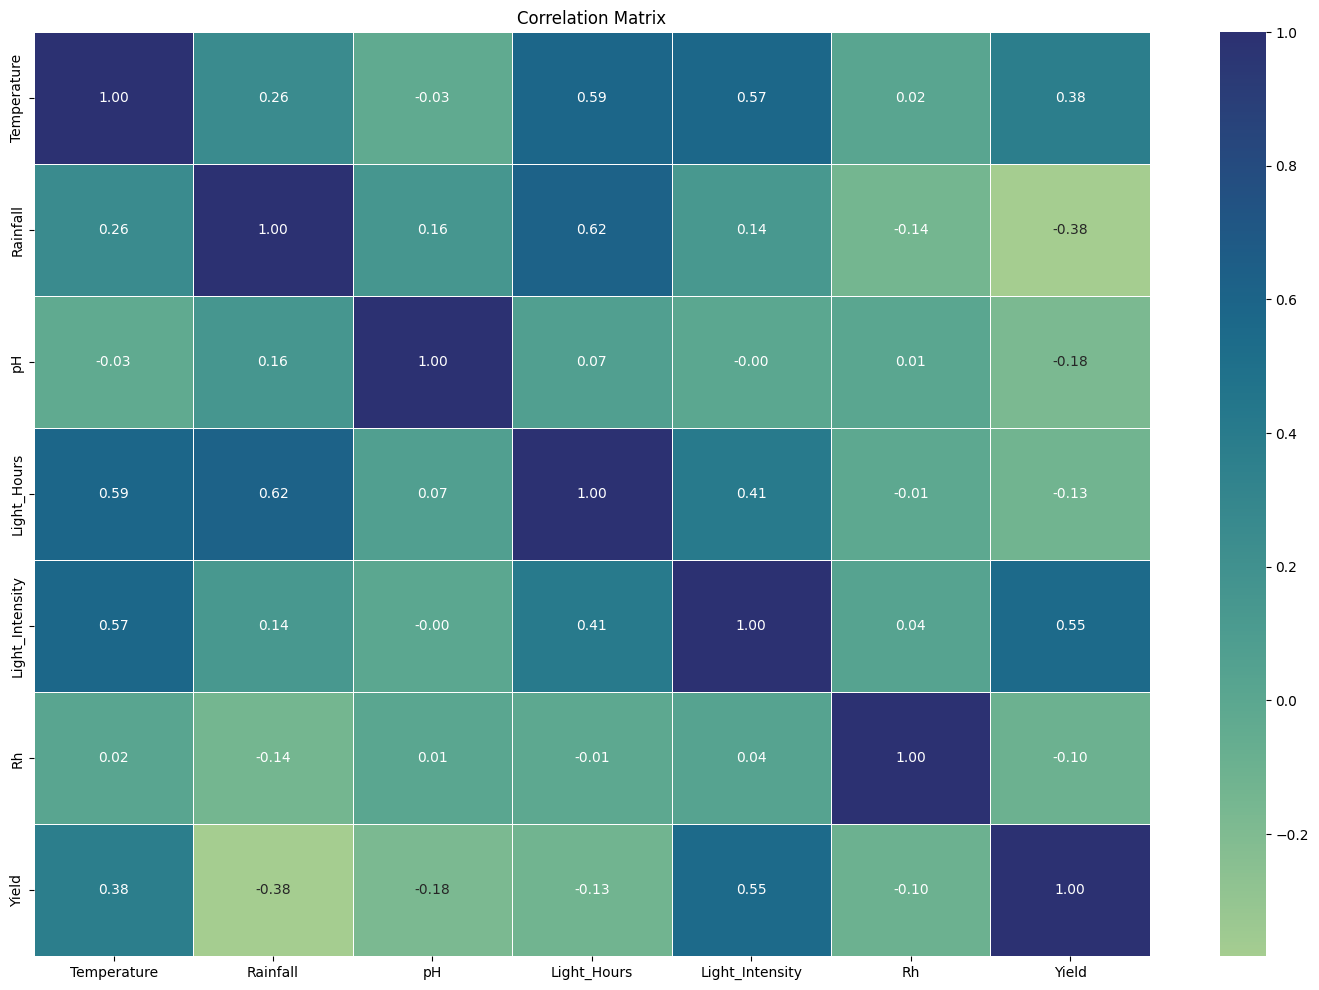

In [ ]:
# Correlation matrix for numerical variables
correlation_matrix = df.select_dtypes(include=['int', 'float']).corr()

# # Create a mask using numpy's triu function
# mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

plt.figure(figsize=(18, 12))
sns.heatmap(correlation_matrix, annot=True, cmap='crest', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix')
plt.show()

## Based on the Corelation matrix, we observe that there is
  * positive, but not so strong corelation between Temperature and Light   Intensity , Light hours
  * positive, but not so strong corelation between Rainfall and Light Hours


## Yield Information for different Crops across Seasons

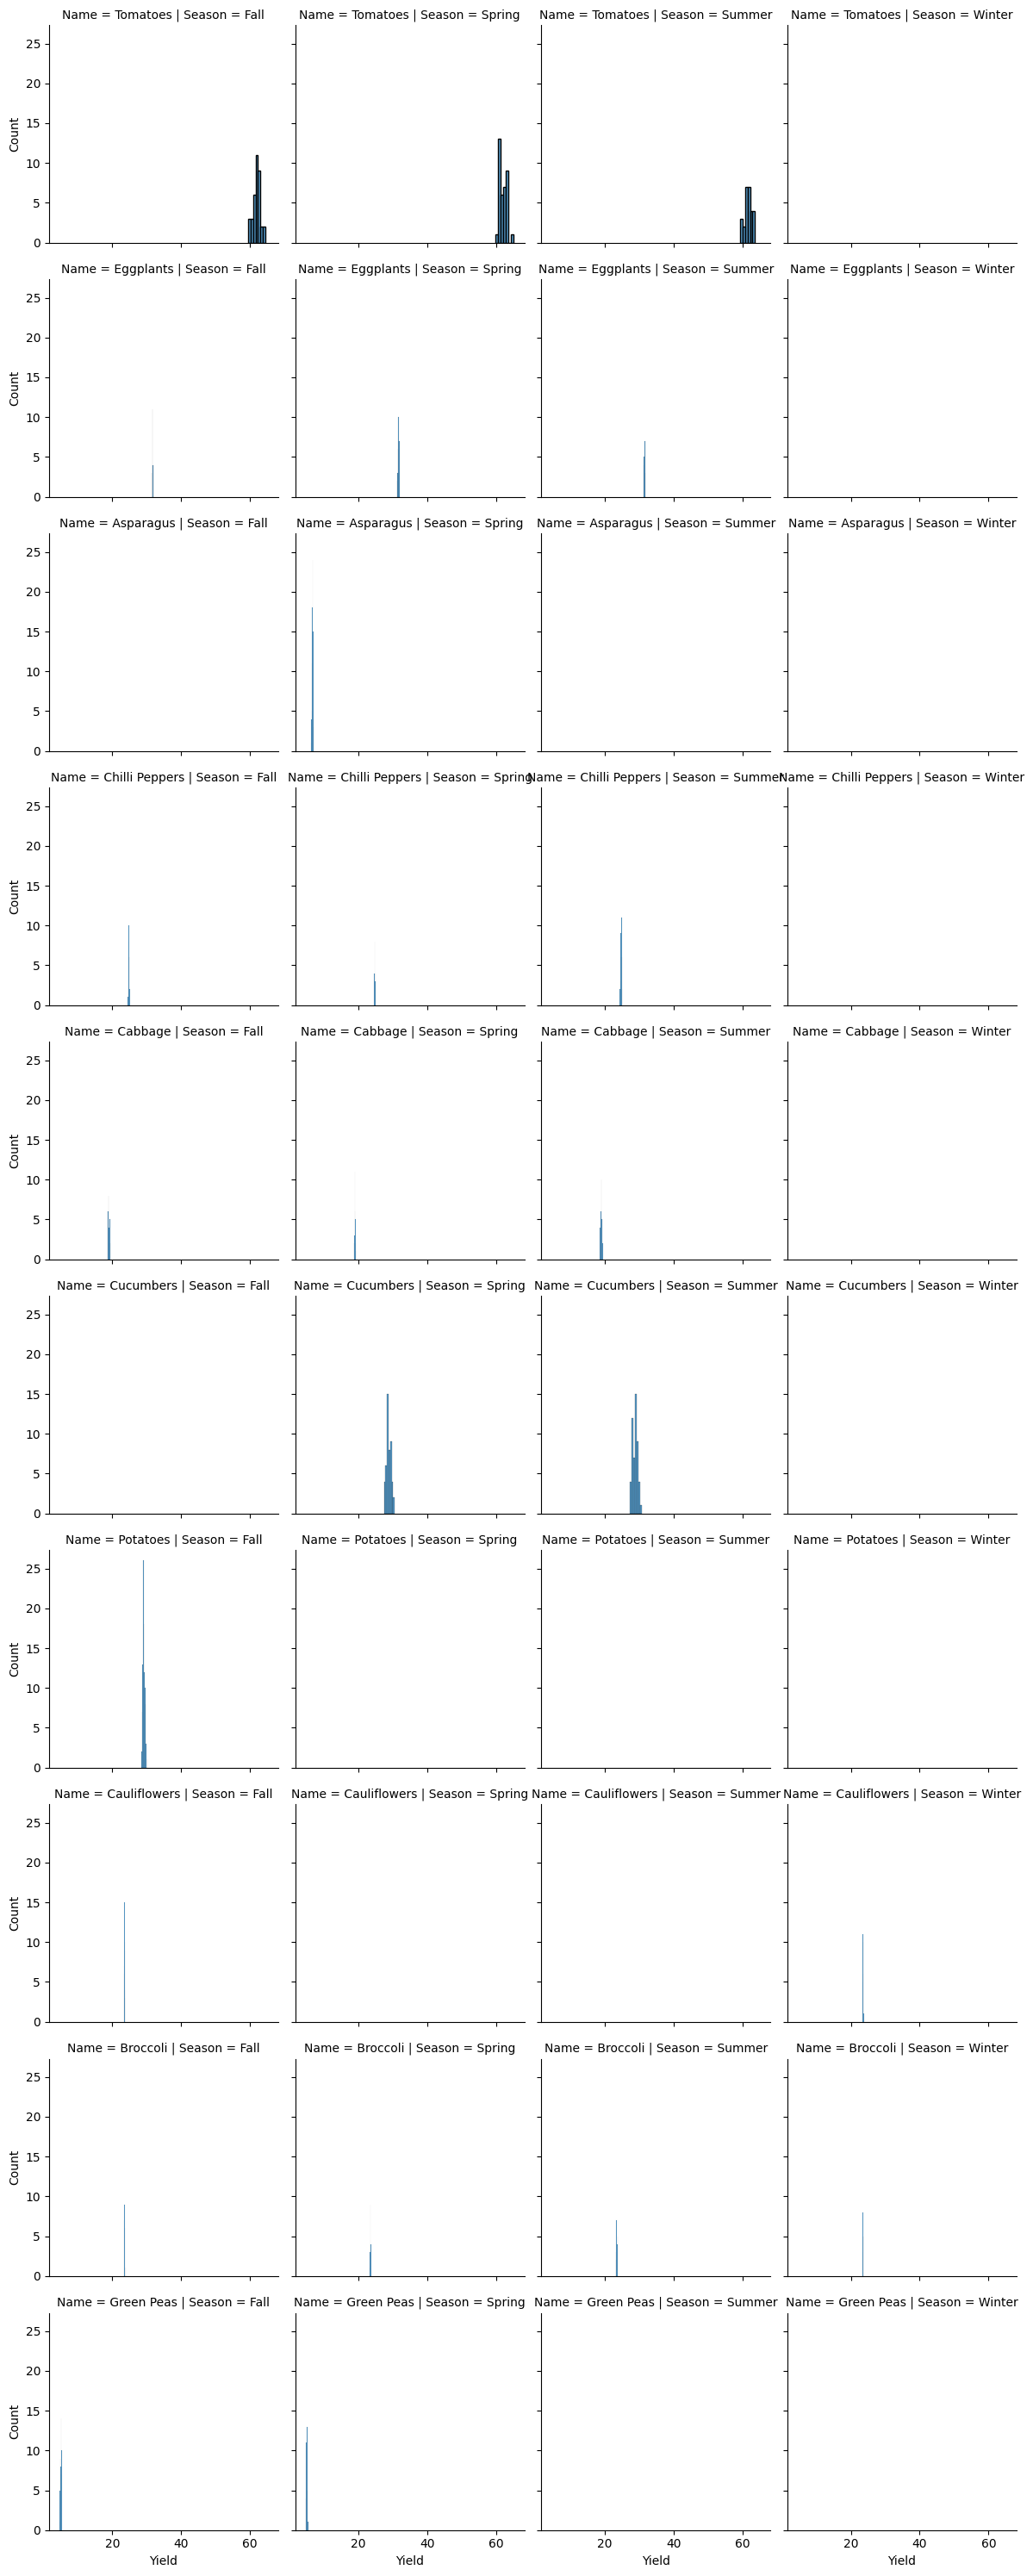

In [ ]:
g = sns.FacetGrid(df, col="Season",  row="Name")
g.map_dataframe(sns.histplot, x="Yield")

## Based on the above plots, we observe that
* Tomatoes, Eggplants, Asparagus and Cucumbers produce high yield during Spring
* Tomatoes yield are high during Spring and Summer
* Potatoes yield are high during fall
* Green peas yield are high during Spring
* Cauliflower and Broccoli yield are high during Fall and Winter

## Box Plot to Identify Outliers in Numerical Features

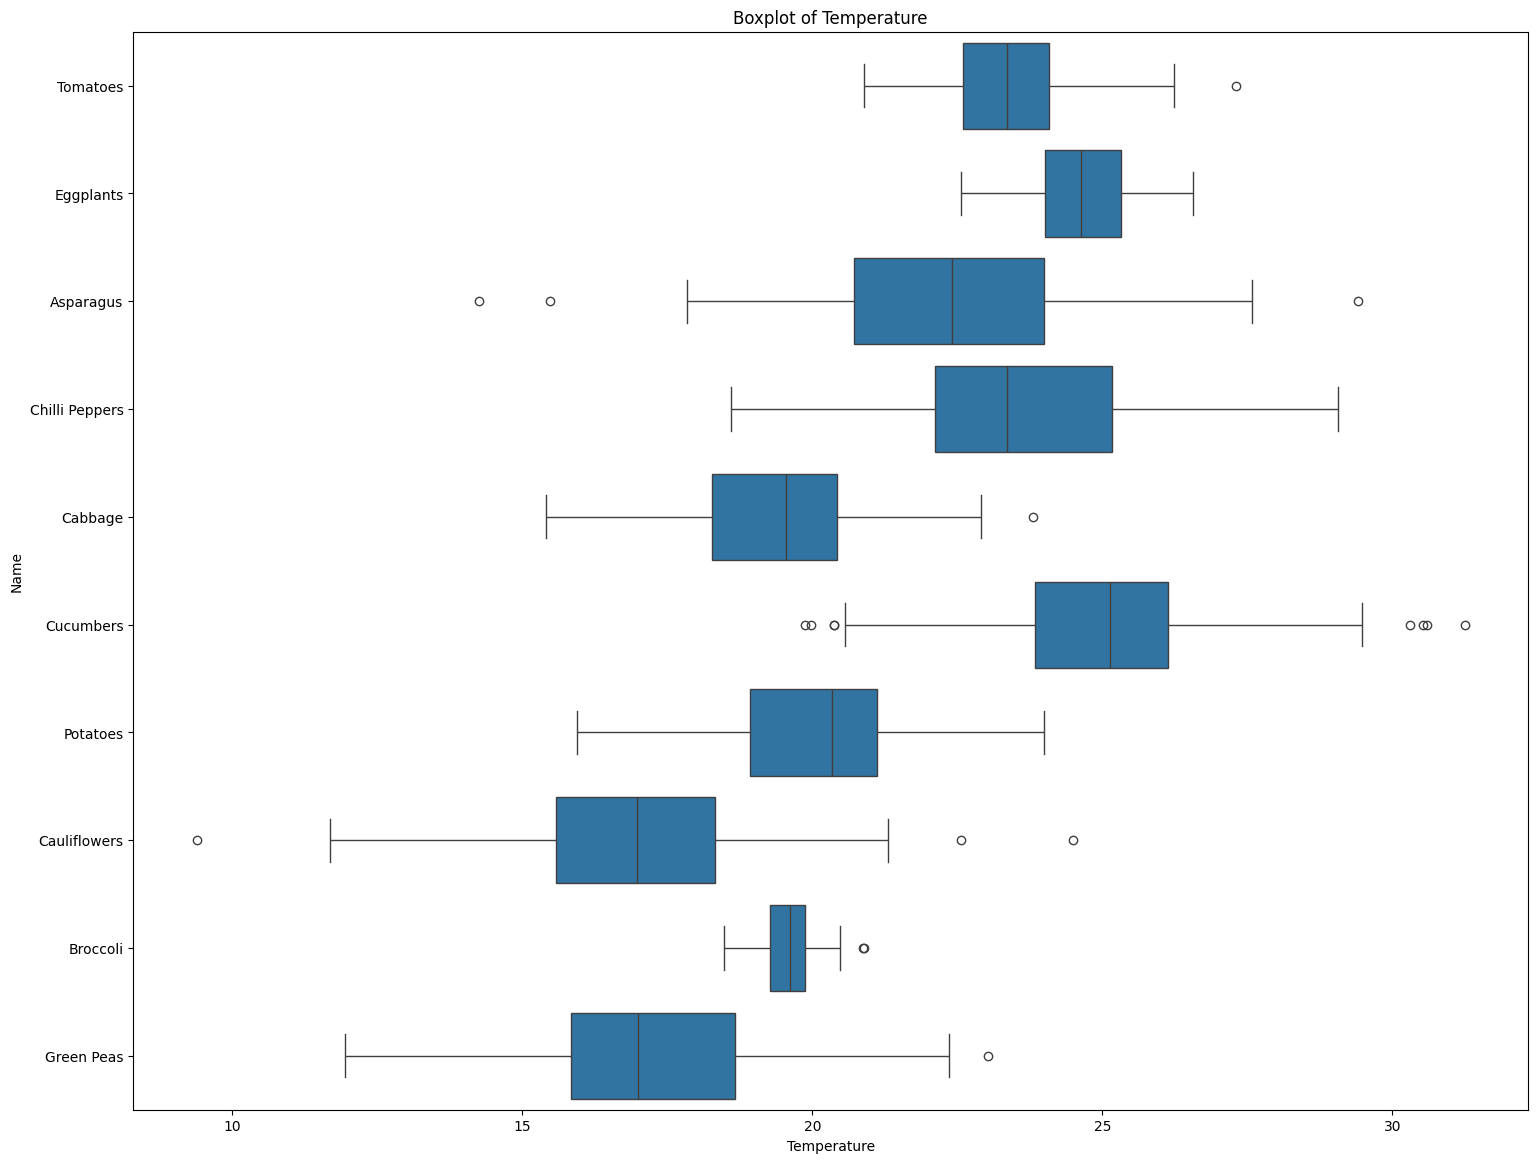

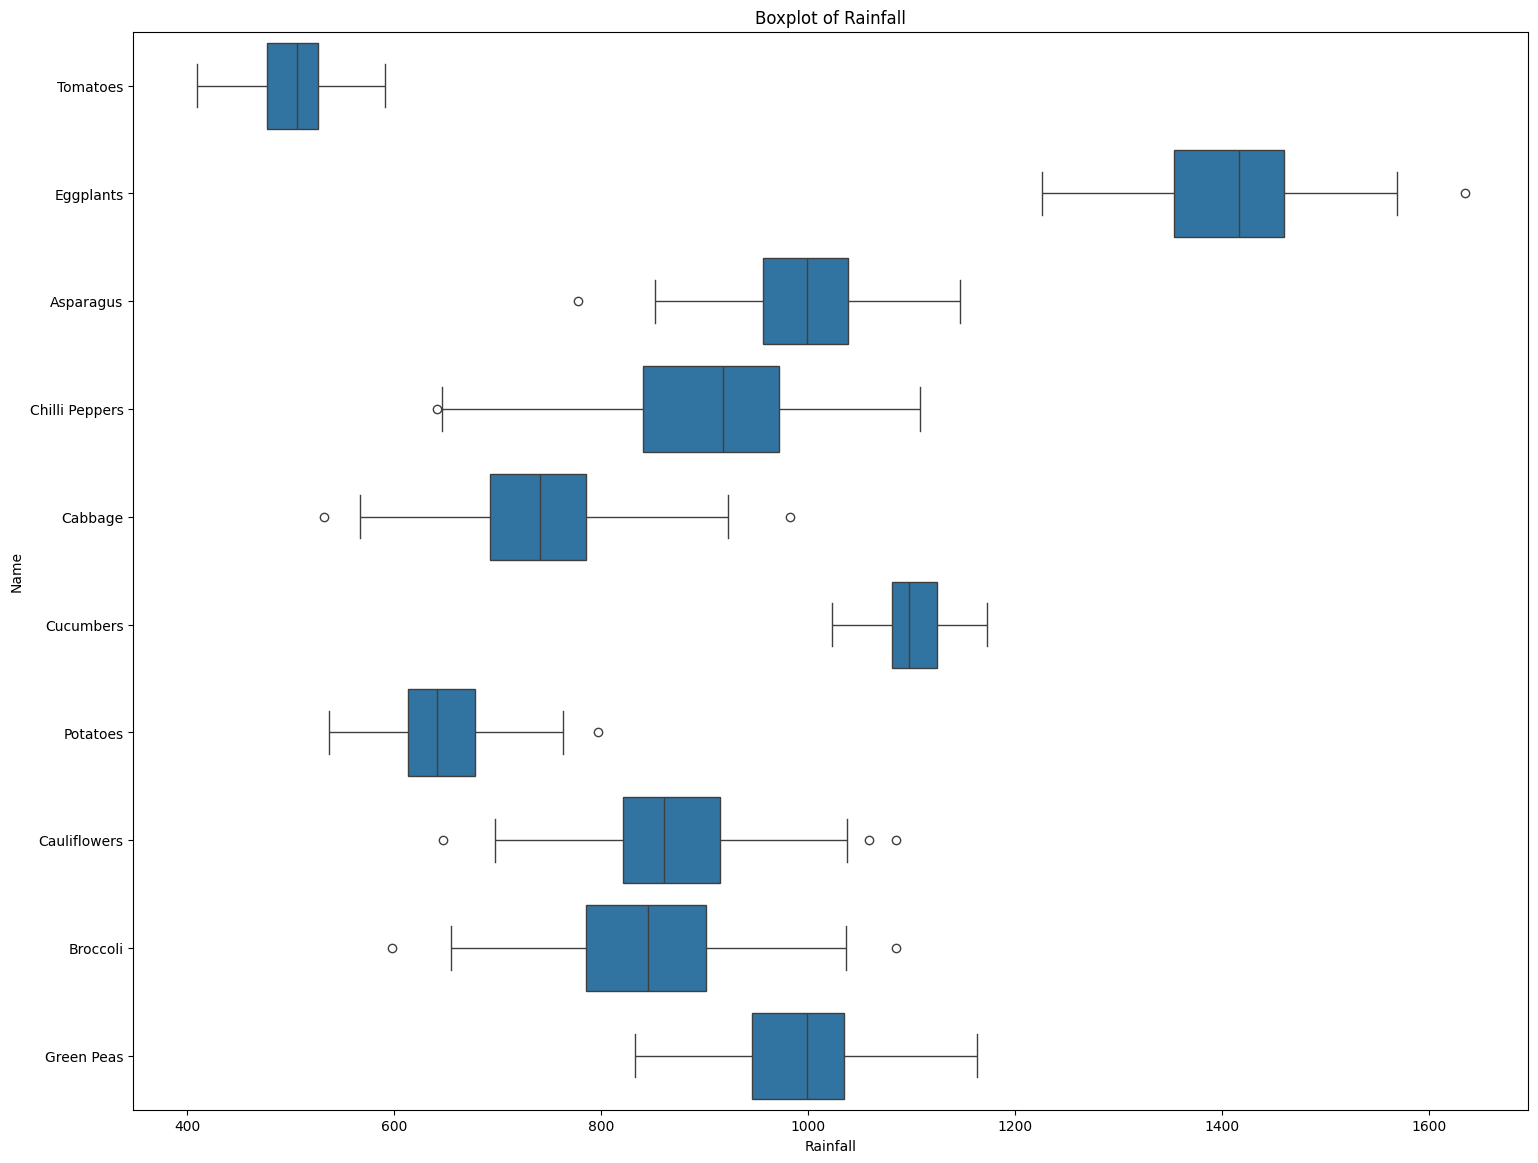

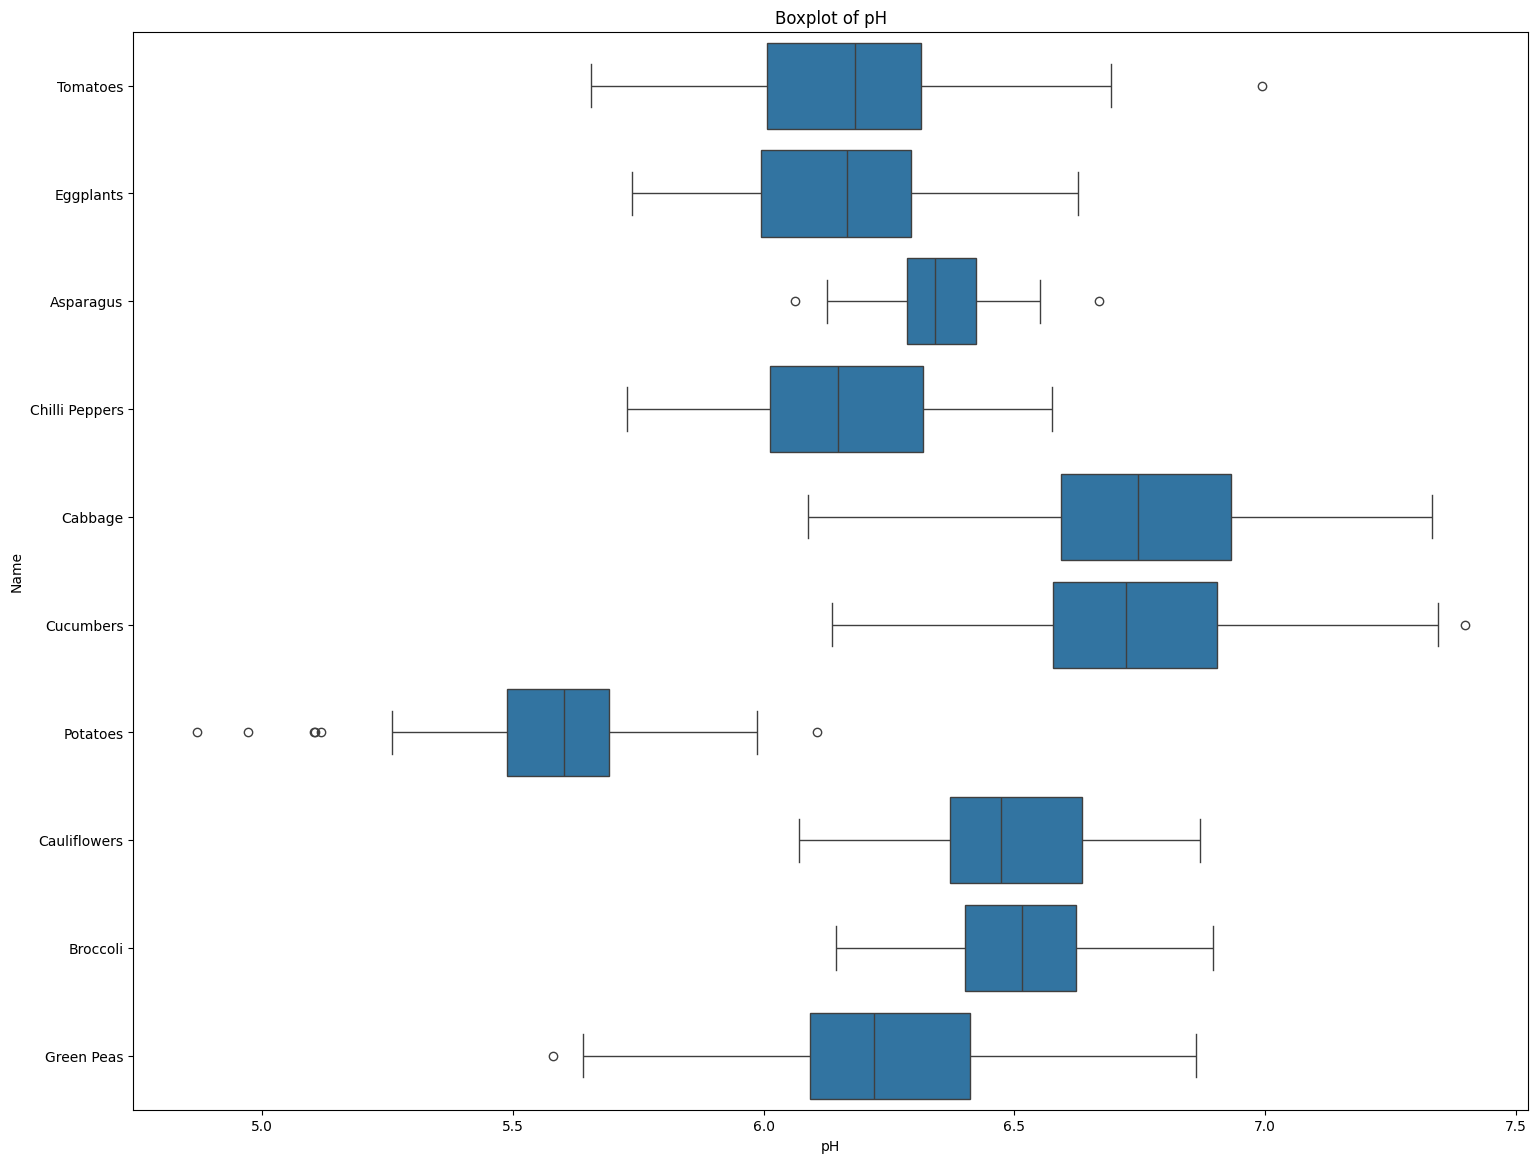

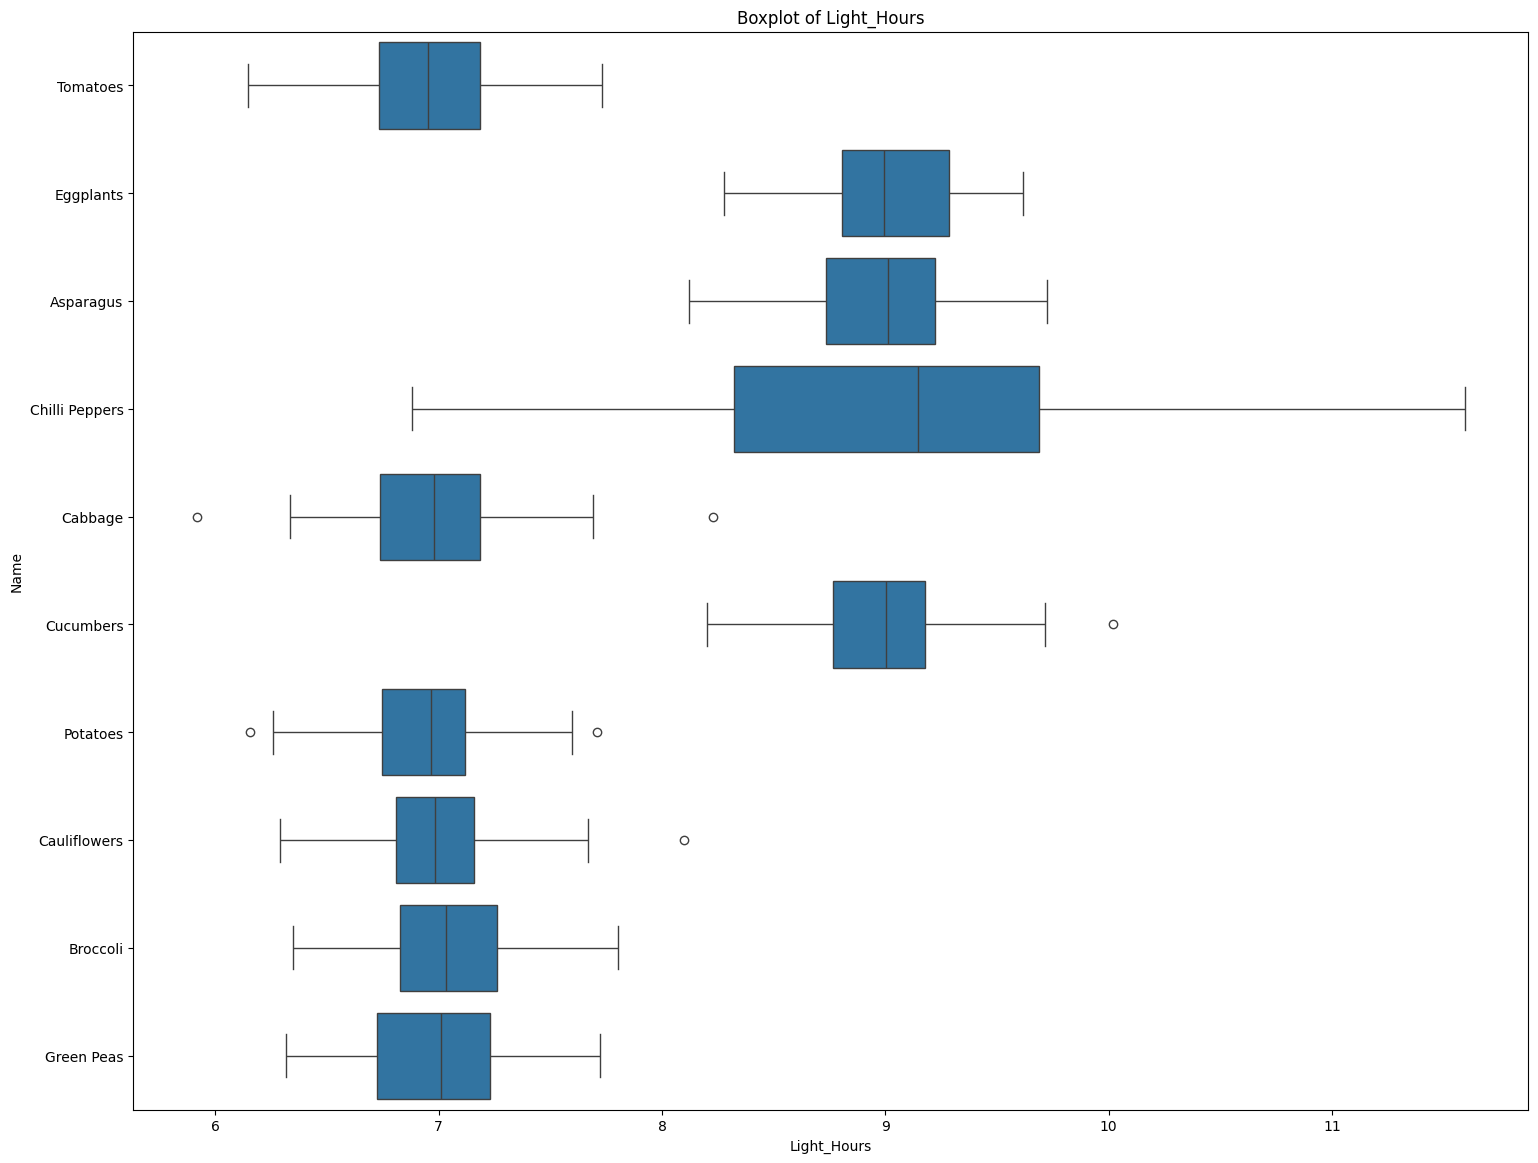

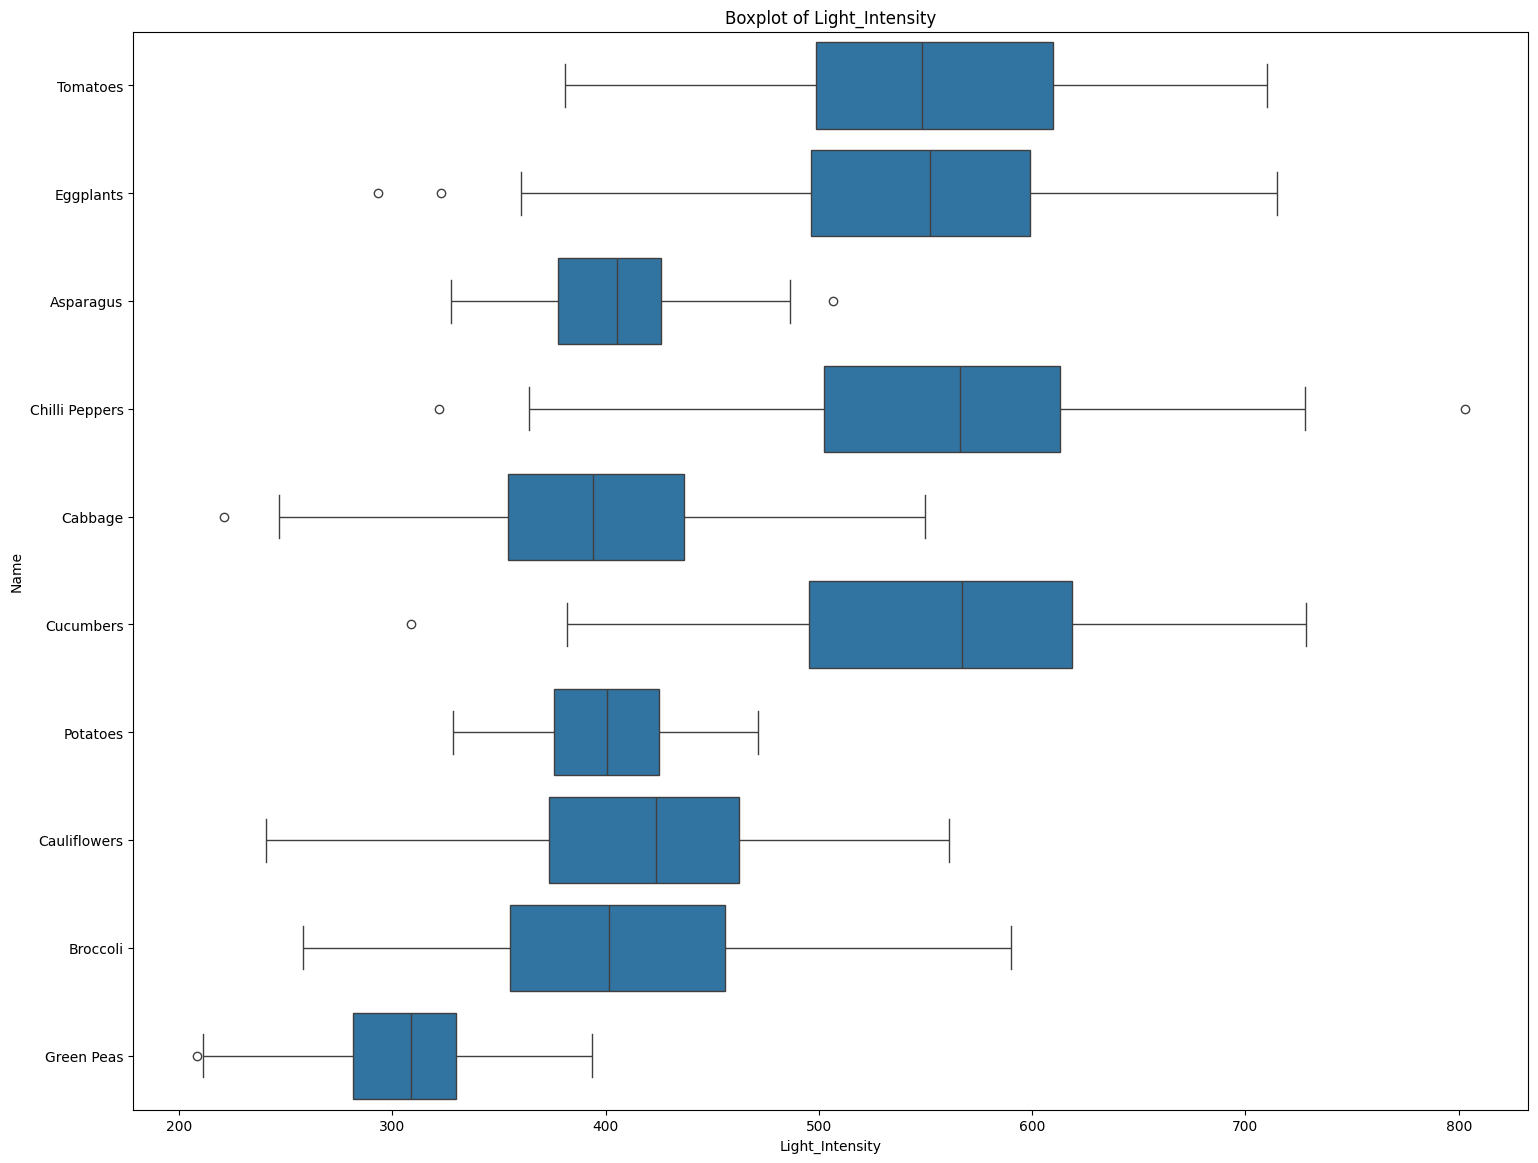

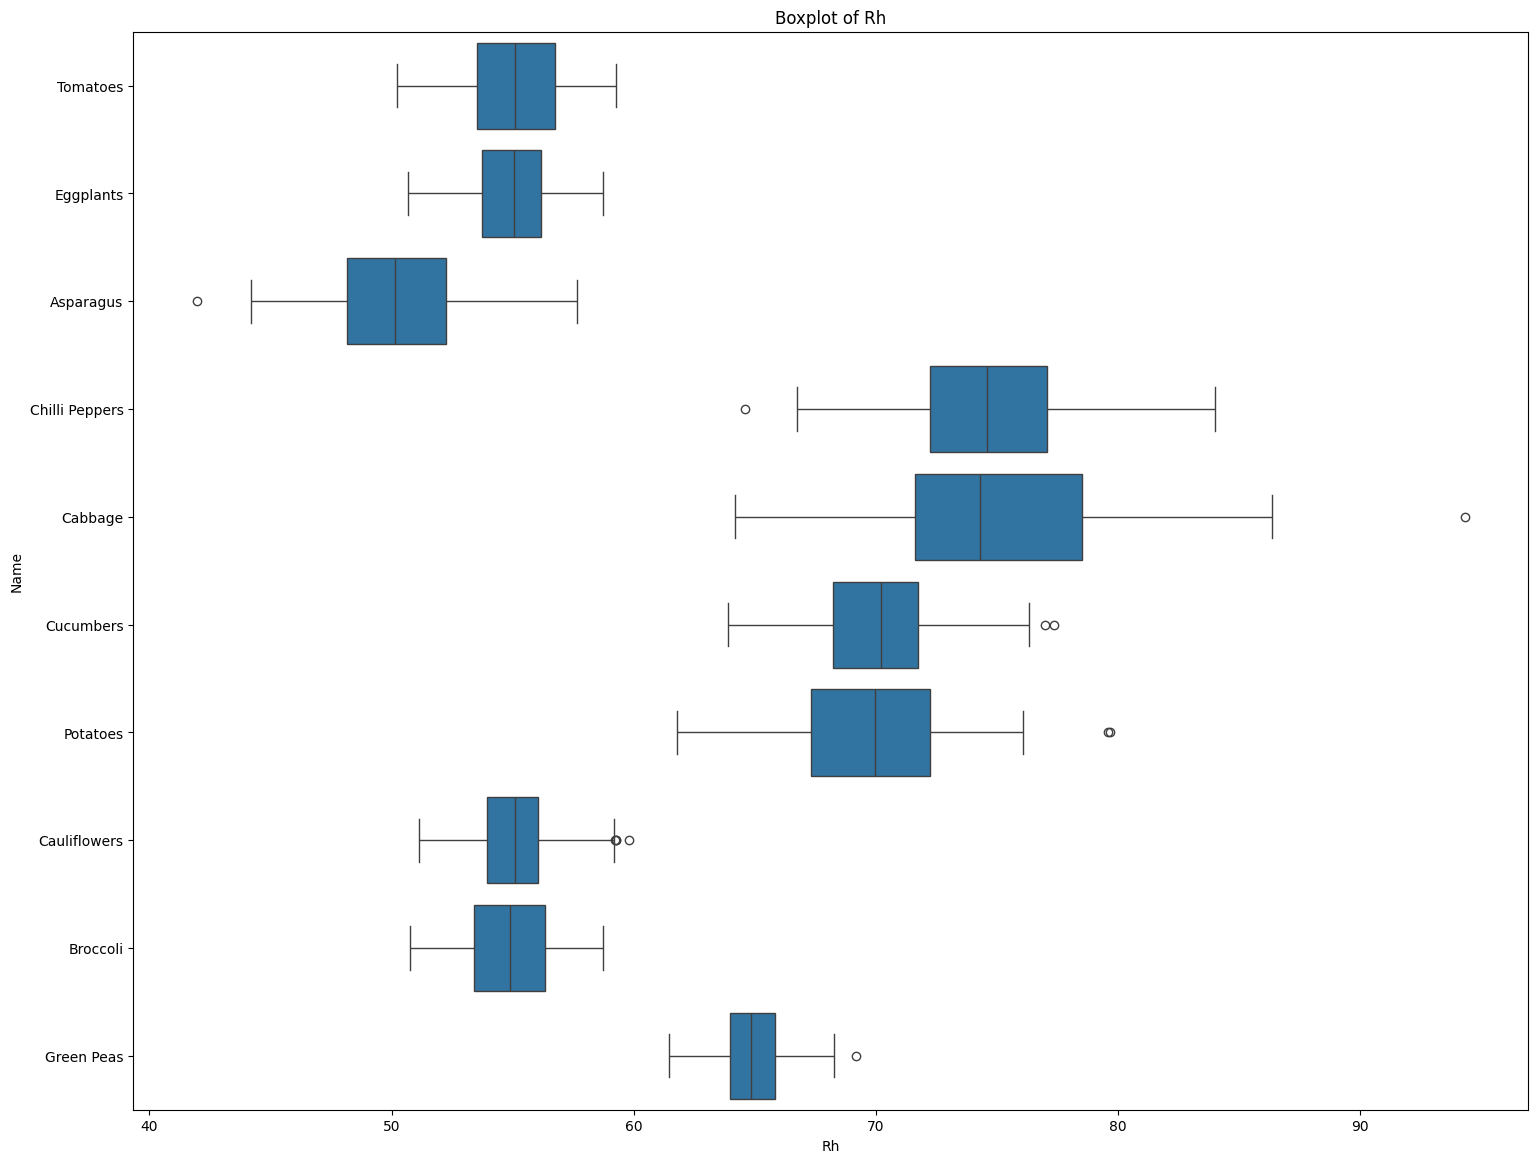

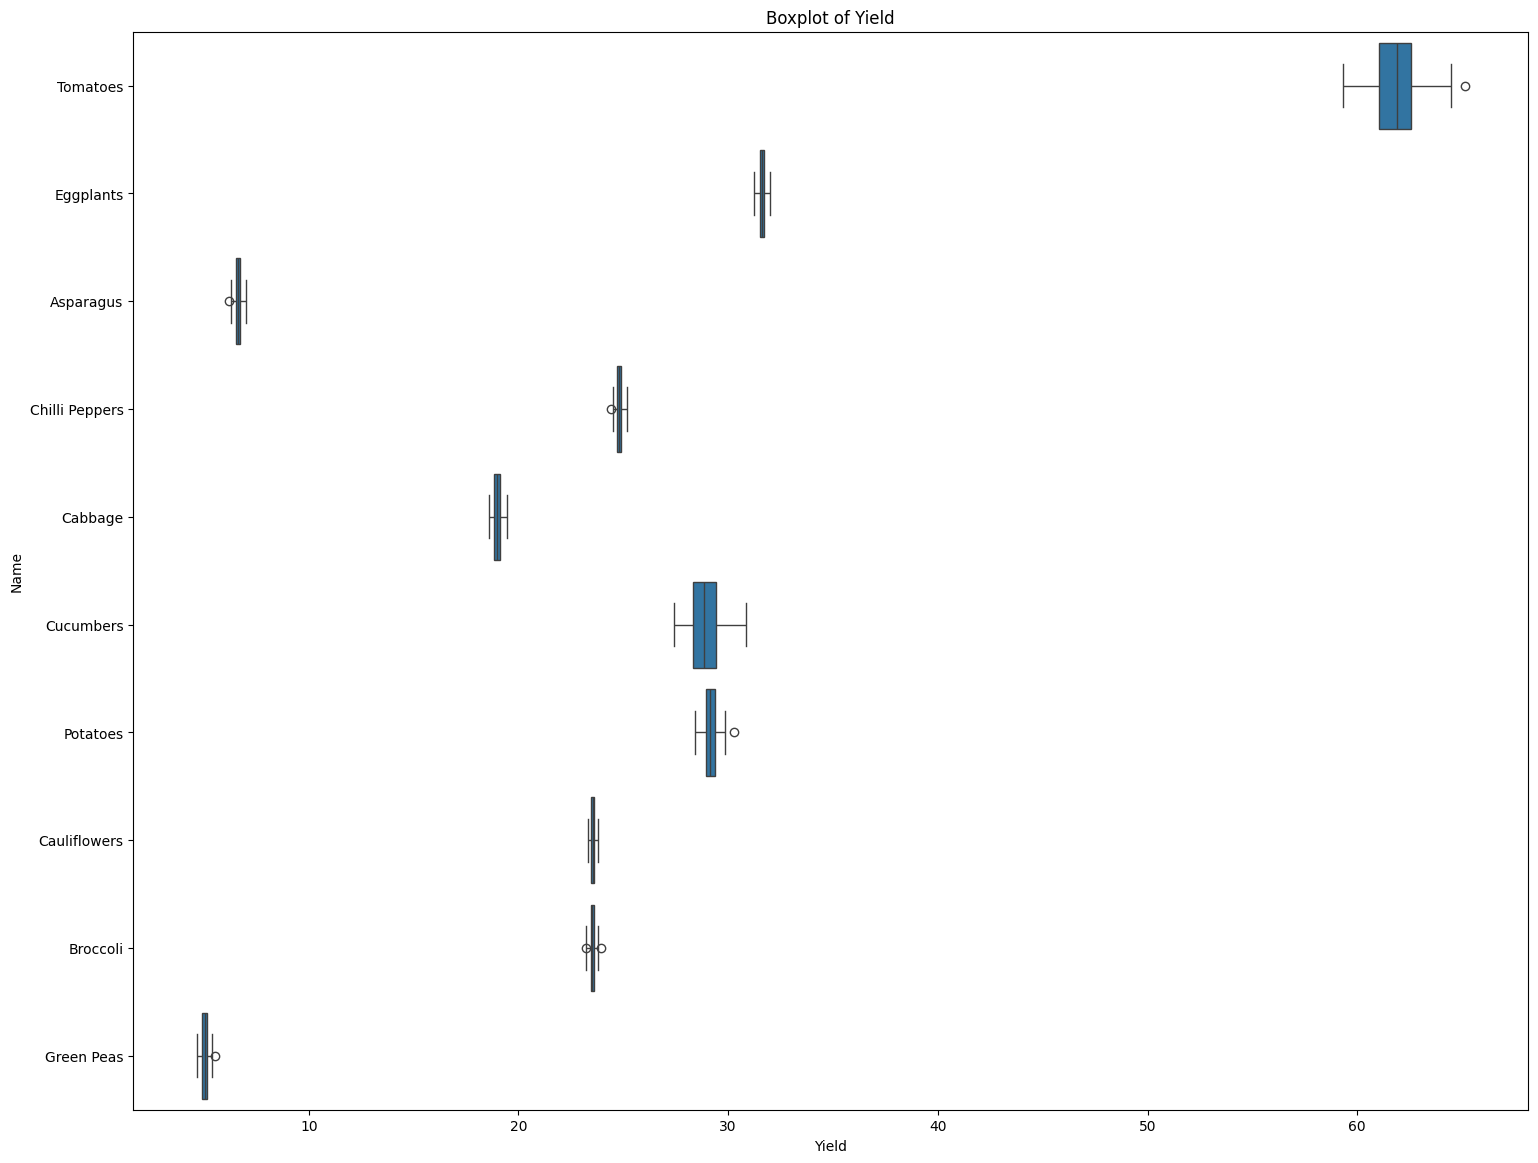

,Name,Soil_Type,Fertility,Photoperiod,N-P-K Ratio,Temperature,Rainfall,pH,Light_Hours,Light_Intensity,Rh,Yield,Season,Temperature_zscore,Rainfall_zscore,pH_zscore,Light_Hours_zscore,Light_Intensity_zscore,Rh_zscore,Yield_zscore
0,Tomatoes,"Fertile, well-drained loam or sandy loam soil",High,Short Day Period,10:10:10,22.489987,495.524098,6.272267,7.398897,529.733246,53.334987,60.647800,Fall,16.222965,491.906036,-10.011221,0.191797,525.525187,46.715294,58.938812
1,Tomatoes,"Fertile, well-drained loam or sandy loam soil",High,Short Day Period,10:10:10,24.008877,454.428932,6.377733,6.625545,667.273615,57.410295,60.624575,Spring,17.741854,450.810870,-9.905755,-0.581556,663.065556,50.790601,58.915588
2,Tomatoes,"Fertile, well-drained loam or sandy loam soil",High,Short Day Period,10:10:10,24.441689,493.920716,6.094119,7.370845,579.474014,51.558559,61.403798,Spring,18.174667,490.302654,-10.189369,0.163745,575.265956,44.938866,59.694811
3,Tomatoes,"Fertile, well-drained loam or sandy loam soil",High,Short Day Period,10:10:10,24.333592,512.838482,6.402487,6.852131,440.244272,54.587046,61.134157,Fall,18.066569,509.220420,-9.881001,-0.354969,436.036213,47.967352,59.425170
4,Tomatoes,"Fertile, well-drained loam or sandy loam soil",High,Short Day Period,10:10:10,23.622718,480.824112,5.803418,6.905422,588.326883,53.892511,61.263540,Summer,17.355696,477.206050,-10.480070,-0.301678,584.118825,47.272817,59.554553
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,Green Peas,"Light, sandy, fertile, and well-drained soil",moderate,Short Day Period,05:10:10,17.066640,969.622748,6.406649,6.535367,288.513368,67.128376,4.743146,Spring,10.799618,966.004686,-9.876839,-0.671734,284.305309,60.508683,3.034159
996,Green Peas,"Light, sandy, fertile, and well-drained soil",moderate,Short Day Period,05:10:10,15.904326,906.162384,6.354532,7.246342,208.199107,63.607147,4.757584,Spring,9.637304,902.544321,-9.928956,0.039242,203.991048,56.987453,3.048597
997,Green Peas,"Light, sandy, fertile, and well-drained soil",moderate,Short Day Period,05:10:10,17.133133,1016.845474,6.219520,7.723282,244.703277,64.502877,4.959721,Fall,10.866111,1013.227411,-10.063968,0.516182,240.495219,57.883183,3.250734
998,Green Peas,"Light, sandy, fertile, and well-drained soil",moderate,Short Day Period,05:10:10,19.606767,948.600157,5.963227,7.018877,329.336105,67.825293,4.995292,Spring,13.339745,944.982095,-10.320261,-0.188223,325.128047,61.205599,3.286305


In [ ]:
# Plot to detect Outliers and also Calculate the ZScores
for col in numerical_columns:
    col_zscore = col + "_zscore"
    df[col_zscore] = df[col] - df[col].mean()/df[col].std(ddof=0)
    plt.figure(figsize=(18, 14))
    sns.boxplot(data=df, x=col, y='Name')
    plt.title(f'Boxplot of {col}')
    plt.show()


df


## There are some outliers observed for almost all features for different crops, handling of outliers need to be further analysed

## Analyse Corelation between features and target(Yield)

In [ ]:
df_ = df.select_dtypes(exclude=['int', 'float'])
for col in df_.columns:
    df[col] = df[col].astype('category').cat.codes


# Corelation between Yield and all other features
df[df.columns[1:]].corr()['Yield'][:]

Soil_Type                 0.011107
Fertility                -0.252317
Photoperiod                    NaN
N-P-K Ratio               0.238016
Temperature               0.377898
Rainfall                 -0.383012
pH                       -0.176869
Light_Hours              -0.125735
Light_Intensity           0.548552
Rh                       -0.101992
Yield                     1.000000
Season                    0.029983
Temperature_zscore        0.377898
Rainfall_zscore          -0.383012
pH_zscore                -0.176869
Light_Hours_zscore       -0.125735
Light_Intensity_zscore    0.548552
Rh_zscore                -0.101992
Yield_zscore              1.000000
Name: Yield, dtype: float64

* Positive corelation is observed between Yield to other features like Light Intensity, Temperature and NPK ratio